In [63]:
import dateutil
import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import yfinance as yf
import matplotlib.pyplot as plt

In [64]:
n=int(input("Enter the number of stocks :"))

lst=[] #For storing the assets

for i in range(n):
    tick=input("Enter the stock name listed in NSE : ")
    t=tick+'.NS'
    lst.append(t)
    
lst.append('^NSEI')

print(lst)

# Set the start and end date
start_date = '2008-01-01' #NSE Data for Nifty 50 index is available from September 2007
end_date = '2021-08-03'
df=[]
for i in range(len(lst)):
    ticker=lst[i]
    data=yf.download(ticker, start_date, end_date)
    df.append(data)

Enter the number of stocks :2
Enter the stock name listed in NSE : RELIANCE
Enter the stock name listed in NSE : INFY
['RELIANCE.NS', 'INFY.NS', '^NSEI']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [65]:
stock_data = pd.concat(df, axis=1, ignore_index=False)
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,
2008-01-01,715.715759,717.944580,702.119629,705.376221,634.321228,4864461,220.824997,222.324997,217.781250,218.356247,164.314651,2001624,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0
2008-01-02,707.047913,714.229797,696.225464,708.719543,637.327820,12588005,218.750000,219.918747,214.050003,218.537506,164.451065,6155056,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0
2008-01-03,706.304932,725.621826,700.918518,719.108582,646.670349,13939233,224.625000,224.625000,211.250000,213.631256,160.759064,12425960,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0
2008-01-04,719.182861,747.861023,719.182861,741.223938,666.557861,16366255,218.425003,218.425003,210.000000,211.862503,159.428085,6166320,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0
2008-01-07,736.716675,750.387085,733.051392,747.972473,672.626648,12650730,208.750000,211.250000,202.875000,204.606247,153.967712,13254200,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0


In [66]:
pf_data=stock_data['Adj Close']
pf_data.head()

pf_data.columns=lst
pf_data.tail()


,RELIANCE.NS,INFY.NS,^NSEI
Date,,,
2021-07-27,2055.000000,1602.550049,15746.450195
2021-07-28,2037.349976,1605.599976,15709.400391
2021-07-29,2053.250000,1617.000000,15778.450195
2021-07-30,2035.300049,1610.500000,15763.049805
2021-08-02,2072.500000,1631.550049,15885.150391


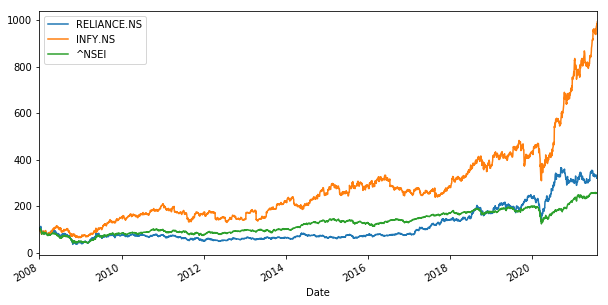

In [67]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))


In [68]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [69]:
log_returns.mean() * 250

RELIANCE.NS    0.088673
INFY.NS        0.171922
^NSEI          0.066113
dtype: float64

In [70]:
log_returns.cov() * 250

,RELIANCE.NS,INFY.NS,^NSEI
RELIANCE.NS,0.113610,0.034158,0.056617
INFY.NS,0.034158,0.094938,0.035347
^NSEI,0.056617,0.035347,0.049503


In [71]:
log_returns.corr()

,RELIANCE.NS,INFY.NS,^NSEI
RELIANCE.NS,1.000000,0.328903,0.752125
INFY.NS,0.328903,1.000000,0.514977
^NSEI,0.752125,0.514977,1.000000


In [72]:
num_assets = len(lst)
num_assets

3

In [73]:
arr = np.random.random(2)
arr

array([0.89405982, 0.98812546])

In [74]:
arr[0] + arr[1]

1.8821852757238933

In [75]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.33437322, 0.41038996, 0.25523682])

In [76]:
sum(weights)

1.0

In [77]:
#Expected Portfolio Returns

np.sum(weights*log_returns.mean())*250

0.11707931055790886

In [78]:
#Expected Portfolio Volatility

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.24157790257778924

In [79]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09639101, 0.09363503, 0.11745134, 0.08150658, 0.09179863,
        0.07599914, 0.10117857, 0.11742249, 0.11050265, 0.09385648,
        0.11187967, 0.11318265, 0.10328542, 0.10333957, 0.13456587,
        0.1211057 , 0.12126414, 0.12277782, 0.09942545, 0.09360309,
        0.08225599, 0.09594224, 0.12267586, 0.08872177, 0.10155282,
        0.1215137 , 0.13778784, 0.10013706, 0.12413871, 0.08345732,
        0.08585852, 0.09929134, 0.08910583, 0.12270119, 0.10050229,
        0.1084663 , 0.09863979, 0.11372555, 0.11586366, 0.11199821,
        0.09716449, 0.11372724, 0.12675812, 0.1123415 , 0.11199883,
        0.10558103, 0.10209554, 0.11459321, 0.12007911, 0.107685  ,
        0.114208  , 0.11837904, 0.0910582 , 0.114571  , 0.10321682,
        0.11212772, 0.14042715, 0.1154783 , 0.07889317, 0.09251825,
        0.10196093, 0.09533617, 0.13410126, 0.11692963, 0.1014622 ,
        0.10004403, 0.10784483, 0.10980278, 0.12613328, 0.07886973,
        0.09006575, 0.1308549 , 0.12579301, 0.08

In [80]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [81]:
portfolios.head()

,Return,Volatility
0,0.096391,0.253168
1,0.093635,0.242941
2,0.117451,0.237314
3,0.081507,0.240660
4,0.091799,0.309731


Text(0, 0.5, 'Expected Return')

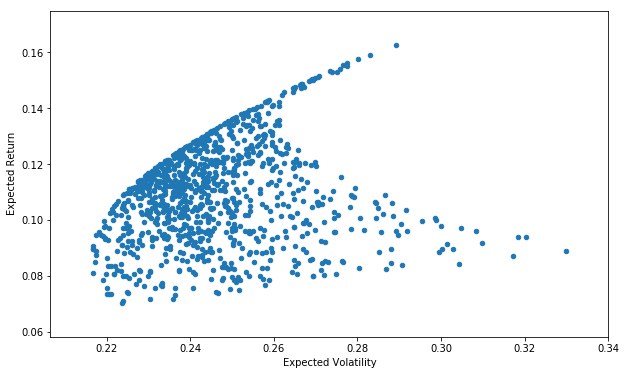

In [82]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')